# Inspect & evaluate MCMC models

## Imports

In [1]:
import numpy as np
import scipy as sp
import cPickle as pickle
import phdmcmc
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
gleam_root = "/Users/phdenzel/gleam"
sys.path.append(gleam_root)
from gleam.utils.lensing import LensModel
from gleam.lensobject import LensObject
from gleam.reconsrc import ReconSrc, run_model
from gleam.utils.plotting import plot_scalebar, plot_labelbox
import gleam.utils.colors as gcl
gcl.GLEAMcmaps.register_all()
from mcmc_eval import load_mcmcpkl, get_mcmcpeaks, get_mcmcstats

## Functions

In [2]:
%%script false

rawmcmc_chains, mcmc_chains = load_mcmcpkl('SDSSJ0753+3416', 300)
imax, (kmeans, clusters) = get_mcmcpeaks(mcmc_chains, verbose=True)

get_mcmcstats(mcmc_chains, rawmcmc_chains)

acc, rej, probs, priors = mcmc_chains

In [3]:
%%script false

plt.plot(acc, color='tab:blue')
plt.title(r'$\theta$ trace')
plt.show()

In [4]:
%%script false

plt.plot(acc, probs, marker='.', lw=0, color='tab:purple')
for ci in clusters:
    plt.axvline(ci, color='tab:blue', alpha=0.5)
plt.axvline(acc[imax], color='tab:red', alpha=0.5)
plt.ylim(top=0)
plt.title(r'PDF')
plt.xlabel(r'$\theta$')
plt.ylabel('log(P)')
plt.show()

In [5]:
%%script false

plt.hist(acc.reshape(acc.shape[0]), bins=100)
plt.xlabel(r'$\theta$')
plt.ylabel(r'log(P)')
plt.show()

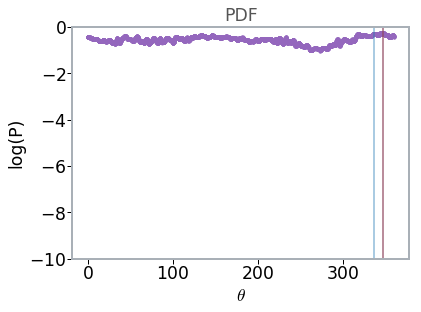

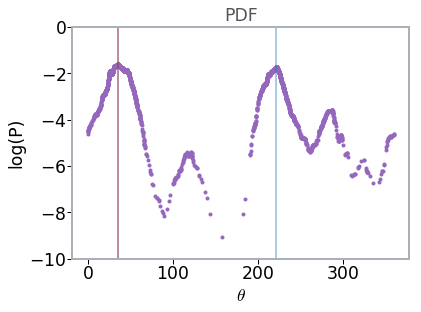

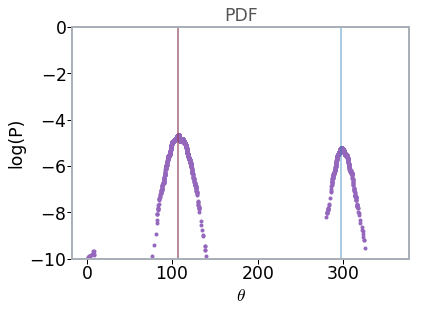

In [6]:
lens = 'SDSSJ0029-0055'   # 'SDSSJ0753+3416'  'SDSSJ0029-0055'   
peaks = []
maxP = []

for mdlidx in range(1, 4):
    
    rawmcmc_chains, mcmc_chains = load_mcmcpkl(lens, mdlidx)
    imax, (kmeans, clusters) = get_mcmcpeaks(mcmc_chains, verbose=False)
    acc, rej, probs, priors = mcmc_chains
    peaks.append(imax)
    maxP.append(acc[imax])

    plt.plot(acc, probs, marker='.', lw=0, color='tab:purple')
    for ci in clusters:
        plt.axvline(ci, color='tab:blue', alpha=0.5)
    plt.axvline(acc[imax], color='tab:red', alpha=0.5)
    plt.ylim(top=0, bottom=-10)
    plt.title(r'PDF')
    plt.xlabel(r'$\theta$')
    plt.ylabel('log(P)')
    plt.show()
    # plt.savefig('mcmc/{}_maxP_mdl{:03d}.png'.format(lens, mdlidx))
    # plt.close()
